<a href="https://colab.research.google.com/github/vasion9/Python451VS/blob/main/week04_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis Using Titanic Dataset

### Titanic: Machine Learning from Disaster.

### First, import packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Typically, you would download the data from Kaggle, but here I am just pulling it from someone else's Github.

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### Create a numerical (binary) column based on the column 'alive'

In [ ]:
# create a column called column_alive which is = 1 if alive is yes and 0 if alive is no

titanic['alive_yes'] = np.where(titanic['alive'] == 'yes', 1, 0)
titanic['Female'] = np.where(titanic['sex'] == 'female', 1, 0)
titanic['alone_yes'] = np.where(titanic['alone'] == True, 1, 0)
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,alive_yes,Female,alone_yes
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1,0


## Now, do the following:



-   Get the summary statistics table.    

-   What are the names of the columns, and how are they indexed?

-   What is the type of each column?    

-   What is the average age of the people aboard the Titanic?   

-   How much revenue (in total and on average) did they collect on this first trip?    

-   How many people survived? What percentage of all people survived?  

-   How many men were on the ship? How many men were there in each pclass in total and on average? How many men survived (total and average)?

-   Do the same as above for women.

-   How many children were aboard the ship? What percent of them were male? -   What percent of children survived?    

-   What percent of men, women, children, and all people survived according to their pclass on-board?

-   Average age of travellers who boarded in Southampton? How much did they pay on average and how much fare was collected in total at Southampton? How many were men, women, or children? What percentage of them survived? Break down the class occupied by people who boarded the Titanic at Southampton.

-   How many people who boarded alone survived (total and average)?

-   Tell me the features of the oldest man and the oldest woman on board (did they survive, which class were they located in, where did they board?).





In [ ]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

print(titanic.describe())
print(titanic.describe(include='all'))

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         N

In [ ]:
print(titanic.columns)

print(titanic.index)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
RangeIndex(start=0, stop=891, step=1)


In [ ]:
print(titanic.dtypes)

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [ ]:
average_age = titanic['age'].mean()

print(f"The average age of people aboard the Titanic was {average_age:.2f} years.")


The average age of people aboard the Titanic was 29.70 years.


In [ ]:
total_revenue = titanic['fare'].sum()

average_fare = titanic['fare'].mean()

print(f"Total revenue collected: ${total_revenue:.2f}")
print(f"Average fare per passenger: ${average_fare:.2f}")

Total revenue collected: $28693.95
Average fare per passenger: $32.20


In [ ]:
total_passengers = len(titanic)

total_survived = titanic['survived'].sum()

survival_rate = (total_survived / total_passengers) * 100

total_men = (titanic['sex'] == 'male').sum()

men_by_pclass = titanic[titanic['sex'] == 'male'].groupby('pclass')['sex'].count()

average_men_per_class = men_by_pclass.mean()

men_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)].shape[0]

average_men_survived_per_class = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)].groupby('pclass').size().mean()

print(f"Total survivors: {total_survived}")
print(f"Survival rate: {survival_rate:.2f}%")
print(f"Total men on board: {total_men}")
print(f"Men in each class:\n{men_by_pclass}")
print(f"Average number of men per class: {average_men_per_class:.2f}")
print(f"Total men who survived: {men_survived}")
print(f"Average men survived per class: {average_men_survived_per_class:.2f}")

Total survivors: 342
Survival rate: 38.38%
Total men on board: 577
Men in each class:
pclass
1    122
2    108
3    347
Name: sex, dtype: int64
Average number of men per class: 192.33
Total men who survived: 109
Average men survived per class: 36.33


In [ ]:
children = titanic[titanic['age'] < 18]
survival_rates = titanic.groupby(['pclass', 'sex'])['survived'].mean() * 100

survival_rates_all = titanic.groupby('pclass')['survived'].mean() * 100

survival_rates_children = children.groupby('pclass')['survived'].mean() * 100

print("Survival rates by class and gender:")
print(survival_rates, "\n")

print("Overall survival rate by class:")
print(survival_rates_all, "\n")

print("Children survival rate by class:")
print(survival_rates_children)

Survival rates by class and gender:
pclass  sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: survived, dtype: float64 

Overall survival rate by class:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64 

Children survival rate by class:
pclass
1    91.666667
2    91.304348
3    37.179487
Name: survived, dtype: float64


In [ ]:
southampton_passengers = titanic[titanic['embarked'] == 'S']
avg_age_southampton = southampton_passengers['age'].mean()
avg_fare_southampton = southampton_passengers['fare'].mean()
total_fare_southampton = southampton_passengers['fare'].sum()
men_southampton = (southampton_passengers['sex'] == 'male').sum()
women_southampton = (southampton_passengers['sex'] == 'female').sum()
children_southampton = (southampton_passengers['age'] < 18).sum()
total_southampton_passengers = len(southampton_passengers)
survived_southampton = southampton_passengers['survived'].sum()
survival_rate_southampton = (survived_southampton / total_southampton_passengers) * 100 if total_southampton_passengers > 0 else 0
class_breakdown_southampton = southampton_passengers['pclass'].value_counts().sort_index()

print(f"Average age of Southampton passengers: {avg_age_southampton:.2f} years")
print(f"Average fare paid by Southampton passengers: ${avg_fare_southampton:.2f}")
print(f"Total fare collected at Southampton: ${total_fare_southampton:.2f}\n")

print(f"Number of men: {men_southampton}")
print(f"Number of women: {women_southampton}")
print(f"Number of children: {children_southampton}")
print(f"Total passengers from Southampton: {total_southampton_passengers}")
print(f"Survival rate of Southampton passengers: {survival_rate_southampton:.2f}%\n")

print("Class distribution of Southampton passengers:")
print(class_breakdown_southampton)

Average age of Southampton passengers: 29.45 years
Average fare paid by Southampton passengers: $27.08
Total fare collected at Southampton: $17439.40

Number of men: 441
Number of women: 203
Number of children: 82
Total passengers from Southampton: 644
Survival rate of Southampton passengers: 33.70%

Class distribution of Southampton passengers:
pclass
1    127
2    164
3    353
Name: count, dtype: int64


In [ ]:
oldest_man = titanic[titanic['sex'] == 'male'].nlargest(1, 'age')
oldest_woman = titanic[titanic['sex'] == 'female'].nlargest(1, 'age')

print("Oldest Man on Board:")
print(oldest_man[['age', 'pclass', 'embarked', 'survived']])

print("\nOldest Woman on Board:")
print(oldest_woman[['age', 'pclass', 'embarked', 'survived']])

Oldest Man on Board:
      age  pclass embarked  survived
630  80.0       1        S         1

Oldest Woman on Board:
      age  pclass embarked  survived
275  63.0       1        S         1


<Axes: xlabel='pclass', ylabel='fare'>

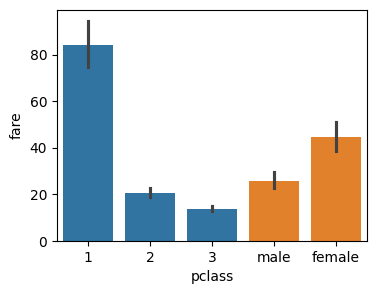

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
sns.barplot(y = "fare",x = "pclass",data = titanic)
sns.barplot(y = "fare",x = "sex",data = titanic)

<Axes: xlabel='survived', ylabel='count'>

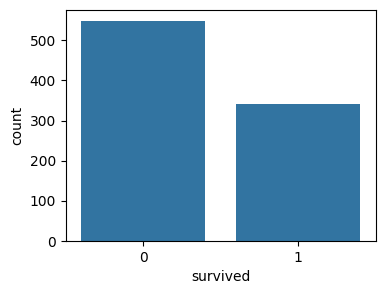

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
sns.countplot(x='survived', data=titanic)

<Axes: xlabel='sex', ylabel='count'>

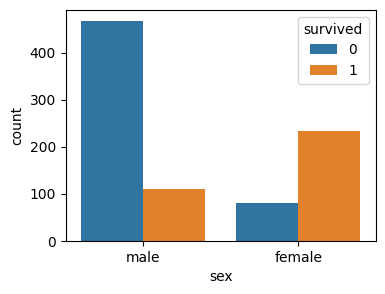

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
sns.countplot(x='sex', hue='survived', data=titanic)

<Axes: xlabel='sex', ylabel='count'>

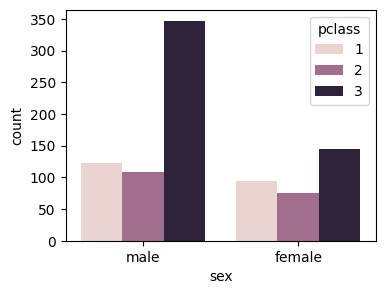

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
sns.countplot(x='sex', hue='pclass', data=titanic)

<Axes: xlabel='pclass', ylabel='count'>

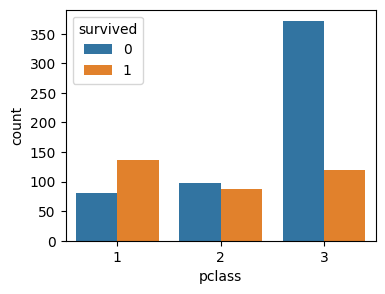

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
sns.countplot(x='pclass', hue='survived', data=titanic)

<Axes: >

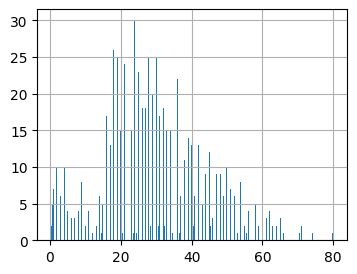

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
titanic['age'].hist(bins=300)

<Axes: xlabel='embarked', ylabel='count'>

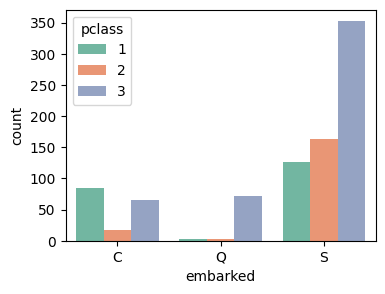

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
sns.countplot(x='embarked', data=titanic, hue='pclass', order = ['C','Q','S'], palette = 'Set2')

<Axes: xlabel='alone', ylabel='count'>

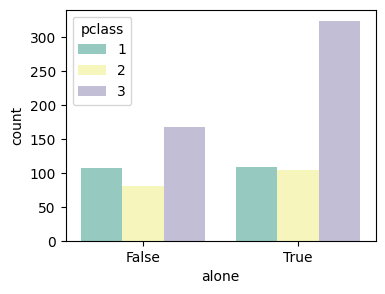

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
sns.countplot(x='alone', data=titanic, hue='pclass', hue_order=range(1,4), palette='Set3')

<Axes: >

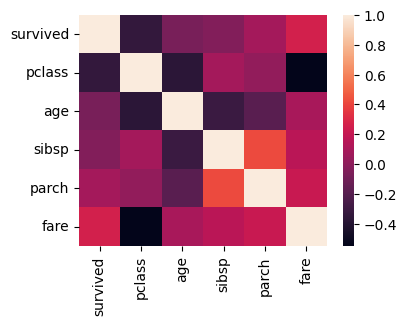

In [ ]:
fig = plt.gcf()
fig.set_size_inches(4, 3)
Corr=titanic.select_dtypes('number').corr()
sns.heatmap(Corr)

In [ ]:
titanic.select_dtypes('number').corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
